# Introduction

Le but de se projet est de requêter l'API Open Weather afin de faire des analyses statisiques sur les villes françaises.

Ce jupyter notebook se concentre sur les possibilités de datavisualisation avec python, au travers de données stockées dans une base mongodb.

# 1. Analyse exploratoire des données

L'exploration de nos données requiert d'importer différentes librairies de Data Visualisation, consultable et exploitable sur PyPi.  
Lien web: https://pypi.org/  
Doc API: https://openweathermap.org/current

In [1]:
# traitement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pymongo import MongoClient
import datetime, time

Le jupyter notebook n'est pas embarqué dans le docker, le notebook traite uniquement sur une base de donnée en local.

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client["meteo"]
collection = db["villes"]

print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'meteo')


Utilisation d'un aggregate pour applatir le JSON stocké en mongodb et faciliter les analyses, notamment en ayant pour chaque champ une colonne associée dans le dataframe.

In [3]:
#df = pd.DataFrame(list(collection.find()))
#df = pd.json_normalize(df)

data = collection.aggregate([{
    '$project': {
        '_id': 1, 
        'coord_lon': "$coord.lon",
        'coord_lat': "$coord.lat",
        'weather_id': "$weather.id",
        'weather_main': "$weather.main",
        'weather_description': "$weather.description",
        'weather_icon': "$weather.icon",
        'base': 1,
        'main_temp': "$main.temp",
        'main_feels_like': "$main.feels_like",
        'main_temp_min': "$main.temp_min",
        'main_temp_max': "$main.temp_max",
        'main_pressure': "$main.pressure",
        'main_humidity': "$main.humidity",
        'main_sea_level': "$main.sea_level",
        'main_grnd_level': "$main.grnd_level",
        'visibility': 1,
        'wind_speed': "$wind.speed",
        'wind_deg': "$wind.deg",
        'wind_gust': "$wind.gust",
        'clouds_all': "$clouds.all",
        'dt': 1,
        'sys_country': "$sys.country",
        'sys_sunrise': "$sys.sunrise",
        'sys_sunset': "$sys.sunset",
        'timezone': 1,
        'id': 1,
        'name': 1,
        'cod': 1}}])

data_list = list(data)
df = pd.DataFrame(data_list)

pd.set_option('display.max_columns', None)

df.shape

(35394, 29)

Les cinq première lignes du dataframe.

In [4]:
df.head()

,_id,base,visibility,dt,timezone,id,name,cod,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,main_sea_level,main_grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,sys_country,sys_sunrise,sys_sunset
0,6773f0d2ac01b99f7d4d4277,stations,10000.0,1735651448,3600,2967103,Peyrat-le-Château,200,1.7723,45.8158,[800],[Clear],[clear sky],[01d],8.57,8.57,8.57,8.57,1030,48,1030,968,1.11,246,1.55,0,FR,1735630447,1735661860
1,6773f0d2ac01b99f7d4d4278,stations,10000.0,1735651448,3600,2967108,Blaye,200,-0.6667,45.1333,[800],[Clear],[clear sky],[01d],8.61,7.44,8.61,8.61,1031,54,1031,1028,2.16,137,2.48,6,FR,1735630880,1735662597
2,6773f0d2ac01b99f7d4d4279,stations,10000.0,1735651449,3600,2967110,Zuydcoote,200,2.4934,51.0610,[804],[Clouds],[overcast clouds],[04d],6.35,2.54,4.99,6.68,1023,86,1023,1022,6.17,200,NaN,100,FR,1735631612,1735660349
3,6773f0d2ac01b99f7d4d427a,stations,10000.0,1735651449,3600,2967112,Zutkerque,200,2.0682,50.8530,[804],[Clouds],[overcast clouds],[04d],6.54,2.22,6.54,6.54,1023,72,1023,1016,7.86,224,14.54,100,FR,1735631654,1735660511
4,6773f0d2ac01b99f7d4d427b,stations,10000.0,1735651449,3600,2967125,Zonza,200,9.1710,41.7481,[800],[Clear],[clear sky],[01d],10.06,8.51,10.06,10.13,1030,53,1030,953,1.45,176,1.22,0,FR,1735627826,1735660928


Résumé statisque de l'ensemble des colonnes du dataframe.

In [5]:
df.describe()

,visibility,dt,timezone,id,cod,coord_lon,coord_lat,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,main_sea_level,main_grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,sys_sunrise,sys_sunset
count,35355.000000,3.539400e+04,35394.0,3.539400e+04,35394.0,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,35394.000000,24331.000000,35394.000000,3.539400e+04,3.539400e+04
mean,9415.488219,1.735652e+09,3600.0,4.008662e+06,200.0,1.924670,46.743599,6.408468,4.498180,6.188433,6.685788,1028.704385,74.352941,1028.704385,999.371956,3.311995,173.721874,5.576522,52.447279,1.735631e+09,1.735662e+09
std,1955.300655,5.384899e+02,0.0,1.568989e+06,0.0,2.762517,2.172067,3.747537,4.452451,3.728624,3.766458,2.018589,16.821945,2.018589,31.297134,2.521818,77.681392,5.039624,45.498550,8.739361e+02,7.983275e+02
min,400.000000,1.735651e+09,3600.0,2.967103e+06,200.0,-4.770900,41.387400,-7.360000,-8.370000,-7.360000,-7.360000,1021.000000,9.000000,1021.000000,752.000000,0.000000,0.000000,0.010000,0.000000,1.735628e+09,1.735660e+09
25%,10000.000000,1.735652e+09,3600.0,2.988609e+06,200.0,-0.319100,44.950000,4.120000,0.620000,3.800000,4.450000,1028.000000,58.000000,1028.000000,994.000000,1.190000,122.000000,1.330000,0.000000,1.735630e+09,1.735661e+09
50%,10000.000000,1.735652e+09,3600.0,3.019340e+06,200.0,1.847800,46.787600,7.090000,4.810000,6.980000,7.270000,1029.000000,77.000000,1029.000000,1011.000000,2.570000,200.000000,2.780000,71.000000,1.735631e+09,1.735662e+09
75%,10000.000000,1.735653e+09,3600.0,6.427624e+06,200.0,3.843600,48.729100,9.080000,8.400000,8.910000,9.290000,1030.000000,89.000000,1030.000000,1018.000000,5.140000,219.000000,10.480000,100.000000,1.735631e+09,1.735662e+09
max,10000.000000,1.735654e+09,3600.0,8.015556e+06,200.0,9.522400,51.077900,16.030000,15.330000,15.980000,16.030000,1032.000000,100.000000,1032.000000,1031.000000,13.380000,360.000000,18.450000,100.000000,1.735633e+09,1.735663e+09


Utilisation d'un diagramme circulaire pour observer la répartition des types de données.

<AxesSubplot:ylabel='None'>

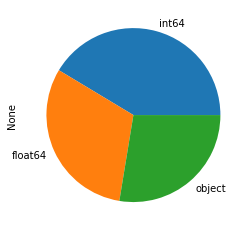

In [6]:
df.dtypes.value_counts().plot.pie()

On regarde le pourcentage de valeurs manquantes par rapport à la totalité des enregistrements dans notre dataframe.

In [7]:
# - on somme le nombre de valeurs manquantes
# - on divise par le nombre total de lignes
# - on trie par ordre décroissant
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

wind_gust              0.312567
visibility             0.001102
_id                    0.000000
main_feels_like        0.000000
sys_sunrise            0.000000
sys_country            0.000000
clouds_all             0.000000
wind_deg               0.000000
wind_speed             0.000000
main_grnd_level        0.000000
main_sea_level         0.000000
main_humidity          0.000000
main_pressure          0.000000
main_temp_max          0.000000
main_temp_min          0.000000
main_temp              0.000000
base                   0.000000
weather_icon           0.000000
weather_description    0.000000
weather_main           0.000000
weather_id             0.000000
coord_lat              0.000000
coord_lon              0.000000
cod                    0.000000
name                   0.000000
id                     0.000000
timezone               0.000000
dt                     0.000000
sys_sunset             0.000000
dtype: float64

Représentation graphique des valeurs manquantes (lecture de l'echelle):
- en blanc: les valeurs manquantes (= 1)
- en noir: les valeurs non manquantes (= 0)

<AxesSubplot:>

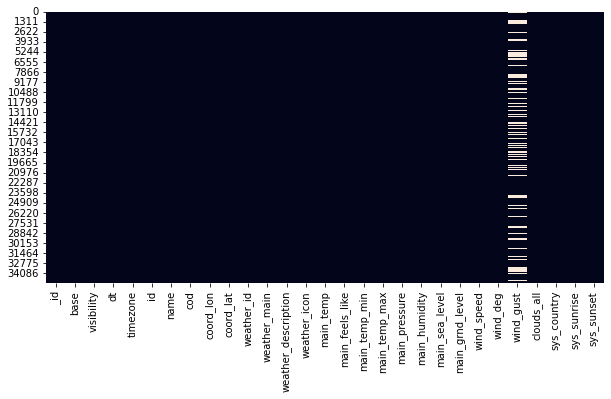

In [8]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.isna(), cbar = False)

On remarque qu'il manque des infos principalement sur la variable *wind_gust*, avec ~30% sur la totalité des enregistrements.  
Plutôt que de supprimer ces lignes (et de perdre en terme de volumétrie de données), on décide de les conserver, mais de ne pas exploiter cette variable dans nos analyses.

## Nettoyage des données

Les données étant relativement propres et exploitable, nous n'avons pas de suppression à faire.  
On peut par la suite vérifier les types de données associés au dataframe.

In [9]:
print(df.columns)
print(df.dtypes)

Index(['_id', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord_lon', 'coord_lat', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon', 'main_temp', 'main_feels_like',
       'main_temp_min', 'main_temp_max', 'main_pressure', 'main_humidity',
       'main_sea_level', 'main_grnd_level', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds_all', 'sys_country', 'sys_sunrise', 'sys_sunset'],
      dtype='object')
_id                     object
base                    object
visibility             float64
dt                       int64
timezone                 int64
id                       int64
name                    object
cod                      int64
coord_lon              float64
coord_lat              float64
weather_id              object
weather_main            object
weather_description     object
weather_icon            object
main_temp              float64
main_feels_like        float64
main_temp_min          float64
main_temp_m

On remarque que la variable *dt* est de type int().  
La doc de l'API nous indique que cette variable correspond à la date à laquelle le JSON a été enregistrée, et qu'elle est enregistrée en unix.  
  
Afin de faciliter la lecture des analyes, on décide de passer cette variable sous forme de date avec le timestamp.

In [10]:
df['dt'] = pd.to_datetime(df['dt'],unit='s')
df['dt'].head()

0   2024-12-31 13:24:08
1   2024-12-31 13:24:08
2   2024-12-31 13:24:09
3   2024-12-31 13:24:09
4   2024-12-31 13:24:09
Name: dt, dtype: datetime64[ns]

On procède également à l'encodage des variables qui nous semblent pertinentes pour les analyses dans les formats appropriés.

In [11]:
df['_id'] = df['_id'].astype('string')
df['base'] = df['base'].astype('string')
df['dt'] = df['dt'].astype('string')
df['name'] = df['name'].astype('string')
df['weather_main'] = df['weather_main'].astype('string')
df['weather_description'] = df['weather_description'].astype('string')

Les données sont maintenant prêtes pour les analyses, on peut passer ainsi passer à la datavisualisation.

# 2. Analyses graphiques

On peut commencer par compter le nombre d'enregistrements que l'on a par type de météo.

In [12]:
df.groupby('weather_main')['_id'].count()

weather_main
['Clear']      14281
['Clouds']     18710
['Drizzle']       76
['Fog']          423
['Mist']        1828
['Rain']          76
Name: _id, dtype: int64

La répresentation sous forme graphique.

Text(0.5, 1.0, "Nombre d'enregistrements par type de météo")

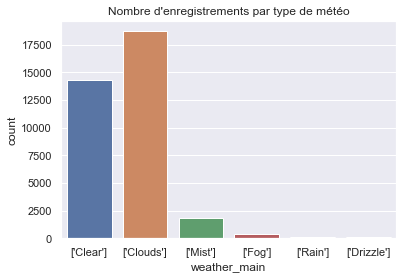

In [13]:
sns.set_theme(style = 'darkgrid')

type_meteo = sns.countplot(x = 'weather_main',  data = df)

# afficher les valeurs sur le graphique
#type_meteo.bar_label(type_meteo.containers[0])

plt.title("Nombre d'enregistrements par type de météo")

Ici, au moment de l'ingestion des données, on peut voir que la majorité des villes sont plutôt partagées entre des temps clair et nuageux.

Voici une distribution de la température sur l'ensemble des données. 
   
On remarque que les villes gravitent autour de températures hivernales, entre -5°C et 15°C, avec des clusters distincts autours des 0°C, et entre 5° et 10C.

<AxesSubplot:xlabel='main_temp', ylabel='Count'>

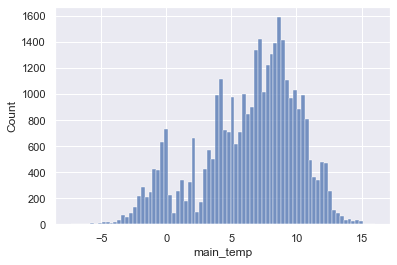

In [14]:
plt.figure()
sns.histplot(df['main_temp'])

Malgré les températures hivernales, on remarque que les vents sont assez faibles.

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

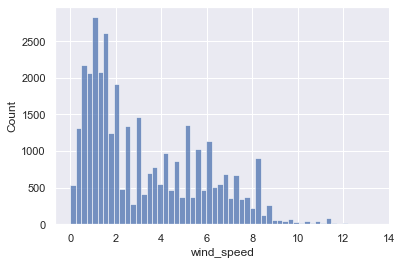

In [15]:
plt.figure()
sns.histplot(df['wind_speed'])

La fonction suivante permet de rendre compte de l'évolution de la température pour une ville donnée.  
  
Dans le cadre de l'analyse, nous avons pris comme exemple Paris et Toulouse pour les journées du 31 décembre, mais nous pouvons tout aussi bien choisir d'autres villes, et générer à nouveau le code python afin de récupérer des données plus récentes.

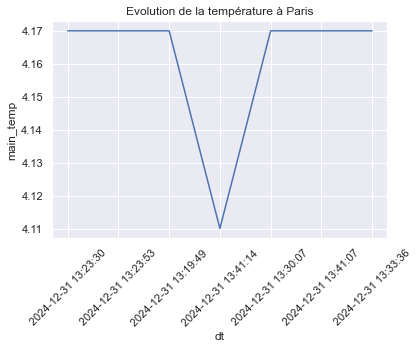

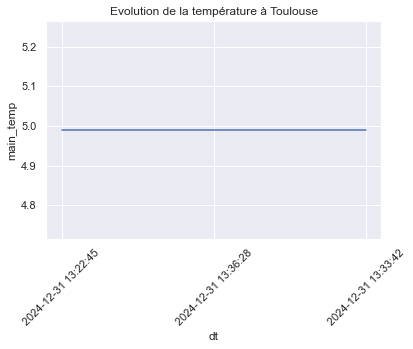

In [16]:
def temperature_par_ville(ville):
    df_filtered = df[df['name'] == ville]
    
    plt.figure()
    ax = sns.lineplot(data = df_filtered,
                 x = df_filtered['dt'],
                 y = df_filtered['main_temp'])
    
    ax.tick_params(axis = 'x', rotation = 45)

    plt.title("Evolution de la température à {}".format(ville))
    
temperature_par_ville('Paris')
temperature_par_ville('Toulouse')